In [1]:
import numpy as np
import matplotlib.pyplot as plt


import scipy as sp

In [2]:
dat=np.loadtxt("data/spatial.dat")
datF=np.loadtxt("data/fourier.dat")

In [3]:
listt=np.arange(40)
listx=np.arange(100)

In [4]:
L=100
tmax=200
alat=2.0*np.pi/L

In [5]:
xx=np.mod( dat.T[1]+L/2, L ) - L/2

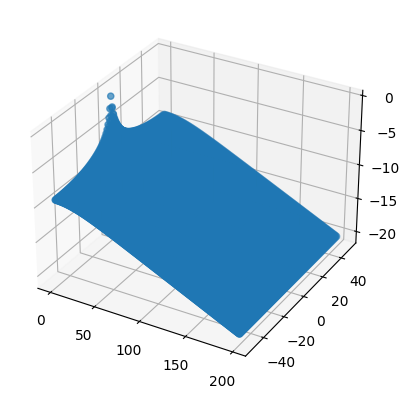

In [6]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.scatter( dat.T[0], xx, np.log(dat.T[2]))
# ax.set_zscale('log')

plt.show()

In [7]:
Z=np.array(np.split(dat.T[2], tmax))
T=np.array(np.split(dat.T[0], tmax))

# tmp=np.mod( dat.T[1]+50, 100)-50
# X=np.array(np.split(tmp, tmax))
X=np.array(np.split(dat.T[1], tmax))

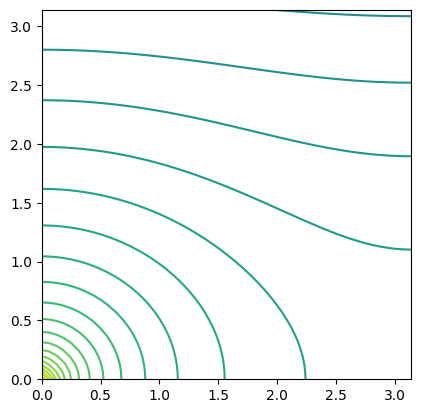

In [8]:
plt.contour( X*alat, T*alat, np.log(Z), 40 )
plt.gca().set_aspect('equal')

plt.xlim(0,L/2*alat)
plt.ylim(0,L/2*alat)

plt.savefig("contourL100.pdf")

plt.show()

(-12.0, 0.0)

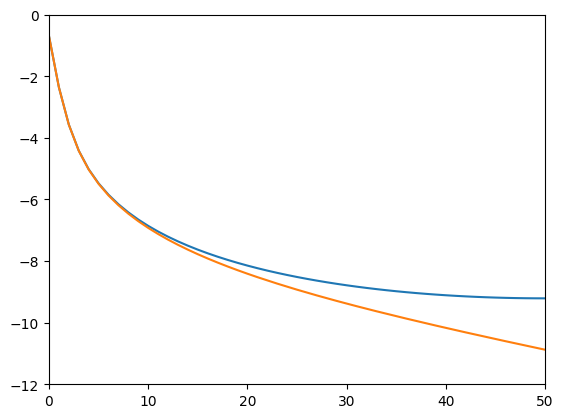

In [9]:
plt.plot(np.log(Z)[0])
plt.plot(np.log(Z.T)[0])

plt.xlim(0,50)
plt.ylim(-12,0)

In [10]:
nmin=3
nmax=9
cut_in_t=dat[L*nmin:L*nmax]
separated=np.array(np.split(cut_in_t, nmax-nmin))
retrieved=separated[:,nmin:nmax]
tofit=np.array(np.split(retrieved.flatten(), (nmax-nmin)**2))

In [11]:
tofit_scaled=np.array([ tofit.T[0]*alat, tofit.T[1]*alat, tofit.T[2] ]).T

In [12]:
def fitter( A, Delta, t, x ):
    return A/(t**2+x**2)**Delta

In [13]:
def f( pars ):
    A=pars[0]
    Delta=pars[1]
    res=0.0
    for i in range(tofit.shape[0]):
        pt=tofit[i]
        diff=fitter( A, Delta, pt[0], pt[1] ) - pt[2]
        res+=(diff*100)**2
    return res

In [14]:
fitres=sp.optimize.minimize( f, [0.1, 1.0] )
A0, Delta0 = fitres['x']
fitres

      fun: 0.00011275841003265406
 hess_inv: array([[0.12497975, 0.37919527],
       [0.37919527, 1.17438618]])
      jac: array([ 1.07062078e-06, -5.83377187e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([0.08969233, 0.97315808])

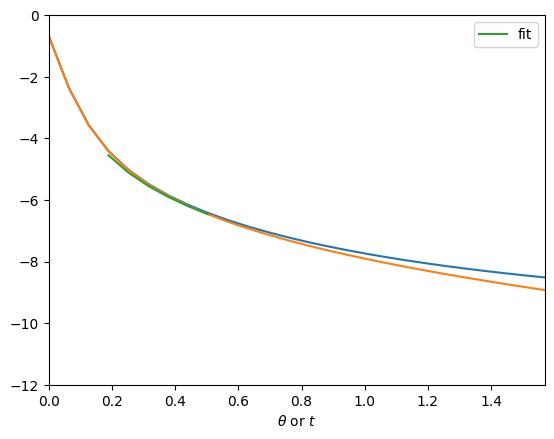

In [15]:
plt.plot( np.arange(L)*alat, np.log(Z)[0] )
plt.plot( np.arange(tmax)*alat, np.log(Z.T)[0])

plt.plot( np.arange(nmin,nmax)*alat, np.log( fitter(A0, Delta0, np.arange(nmin,nmax), 0.0 ) ), label="fit" )

# plt.xlim(0,50)
# plt.ylim(-12,0)
plt.xlim(0, np.pi/2)
plt.ylim(-12,0)

plt.xlabel("$\\theta$ or $t$")

plt.savefig("fitcontourL100.pdf")

plt.legend()

In [16]:
Z=np.array(np.split(datF.T[2], tmax))
T=np.array(np.split(datF.T[0], tmax))
X=np.array(np.split(datF.T[1], tmax))

In [17]:
tofit=np.array([ T.T[0], Z.T[0] ]).T

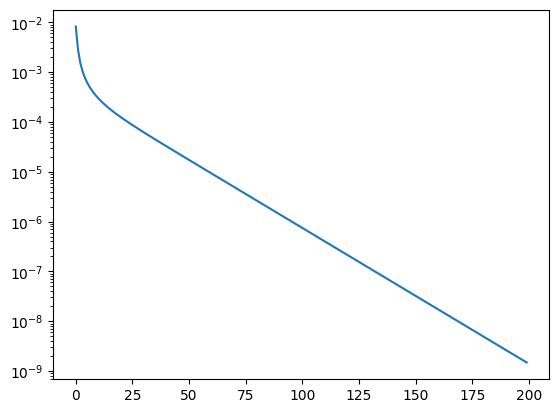

In [18]:
plt.plot(tofit.T[0], tofit.T[1])
plt.yscale("log")

In [19]:
fitm=25
fitM=50

In [20]:
def fitter( A, Delta, t ):
    return A*np.exp(-alat*Delta*t)

In [21]:
def f( pars ):
    A=pars[0]
    Delta=pars[1]
    res=0.0
    for i in range(fitm,fitM):
        pt=tofit[i]
        diff=fitter( A, Delta, pt[0] ) - pt[1]
        res+=(diff*100)**2
    return res

In [22]:
fitres=sp.optimize.minimize( f, [4.1e-4, 2.0], method='powell' )
A0, Delta0 = fitres['x']
fitres

   direc: array([[-2.82708796e-04, -2.30263543e-01],
       [-5.39651718e-05, -6.95222671e-02]])
     fun: 1.1468333666996244e-08
 message: 'Optimization terminated successfully.'
    nfev: 295
     nit: 10
  status: 0
 success: True
       x: array([4.37713884e-04, 1.03356445e+00])

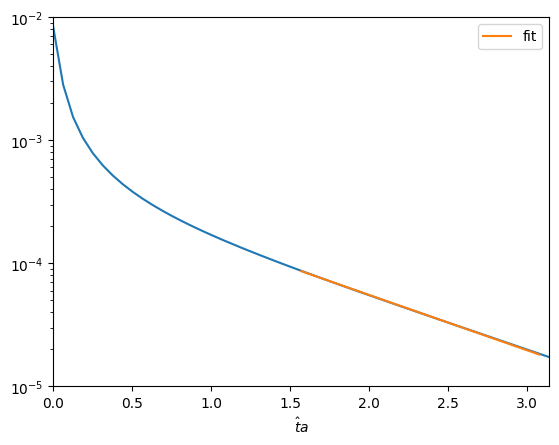

In [23]:
plt.plot( tofit.T[0]*alat, tofit.T[1])
plt.plot( np.arange(fitm, fitM)*alat, fitter( A0, Delta0, np.arange(fitm, fitM) ), label="fit")

plt.yscale("log")
plt.xlabel("$\\hat{t} a$")

plt.xlim(0, np.pi)
plt.ylim(1.0e-5, 1.0e-2)

plt.savefig("fitk0L100.pdf")

plt.legend()

In [24]:
k=1

In [25]:
tofit=np.array([ T.T[k], Z.T[k] ]).T

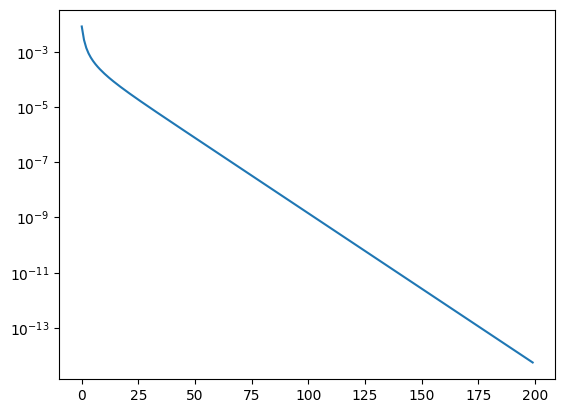

In [26]:
plt.plot(tofit.T[0], tofit.T[1])
plt.yscale("log")

In [27]:
fitm=25
fitM=50

In [28]:
def fitter( A, Delta, t ):
    return A*np.exp(-alat*Delta*t)

In [29]:
def f( pars ):
    A=pars[0]
    Delta=pars[1]
    res=0.0
    for i in range(fitm,fitM):
        pt=tofit[i]
        diff=fitter( A, Delta, pt[0] ) - pt[1]
        res+=(diff*100)**2
    return res

In [30]:
fitres=sp.optimize.minimize( f, [4.1e-4, 2.0], method='powell' )
A0, Delta0 = fitres['x']
fitres

   direc: array([[-8.21861040e-08, -1.10739357e-04],
       [-7.54108464e-08, -1.03344539e-04]])
     fun: 1.5503423908808629e-10
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 2000
     nit: 72
  status: 1
 success: False
       x: array([4.45113565e-04, 2.04239070e+00])

In [31]:
tofit.shape

(200, 2)

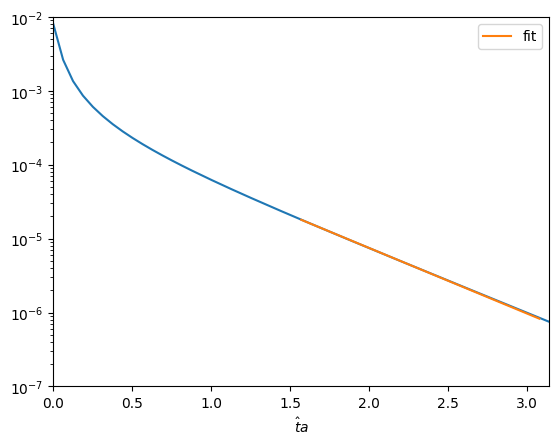

In [32]:
plt.plot( tofit.T[0]*alat, tofit.T[1])
plt.plot( np.arange(fitm, fitM)*alat, fitter( A0, Delta0, np.arange(fitm, fitM) ), label="fit")

plt.yscale("log")
plt.xlabel("$\\hat{t} a$")

plt.xlim(0, np.pi)
plt.ylim(1.0e-7, 1.0e-2)

plt.savefig("fitk1L100.pdf")

plt.legend()